Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


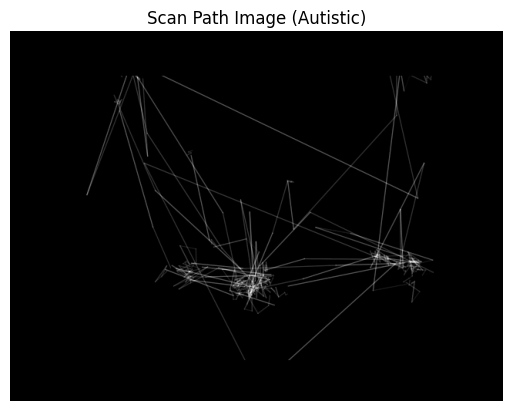

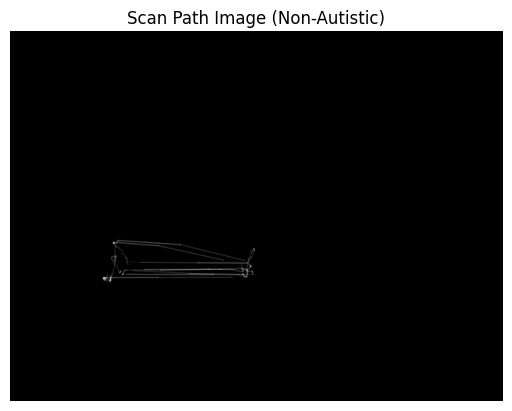

In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

tsi_folder_path = '/content/drive/MyDrive/TSImages'
tci_folder_path = '/content/drive/MyDrive/TCImages'

# Listing all PNG files in the directory
tsi_image_files = [f for f in os.listdir(tsi_folder_path) if f.endswith('.png')]
tci_image_files = [f for f in os.listdir(tci_folder_path) if f.endswith('.png')]

# Loading images into a list
def load_images_from_folder(folder_path, image_files, enhancement_factor=2.0):
    images = []
    dimensions = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        # Enhance contrast
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(enhancement_factor)
        images.append(np.array(img))
        dimensions.append(img.size)
    return images, dimensions

# Load and enhance images
tsi_images, tsi_image_dimensions = load_images_from_folder(tsi_folder_path, tsi_image_files)
tci_images, tci_image_dimensions = load_images_from_folder(tci_folder_path, tci_image_files)

# Display the first enhanced image
plt.imshow(tsi_images[0], cmap='gray')
plt.title('Scan Path Image (Autistic)')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(tci_images[0], cmap='gray')
plt.title('Scan Path Image (Non-Autistic)')
plt.axis('off')  # Hide axes
plt.show()

# Convert images to numpy arrays
def images_to_array(images):
    return np.array(images)

# Convert images
tsi_images_array = images_to_array(tsi_images)
tci_images_array = images_to_array(tci_images)

# Create labels
labels_tsi = np.ones(len(tsi_images_array))  # Label 1 for ASD
labels_tci = np.zeros(len(tci_images_array))  # Label 0 for non-ASD

# Combine images and labels
images_array = np.concatenate((tsi_images_array, tci_images_array), axis=0)
labels_array = np.concatenate((labels_tsi, labels_tci), axis=0)

# Flatten the images (convert each image to a 1D array)
X_flattened = images_array.reshape(images_array.shape[0], -1)



# Check the shapes of the splits
#print(f"Training data shape: {X_train.shape}")
#print(f"Testing data shape: {X_test.shape}")
#print(f"Training labels shape: {y_train.shape}")
#print(f"Testing labels shape: {y_test.shape}")



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, labels_array, test_size=0.2, random_state=42)

Best C: 0.1
Best Accuracy: 0.746055381400209


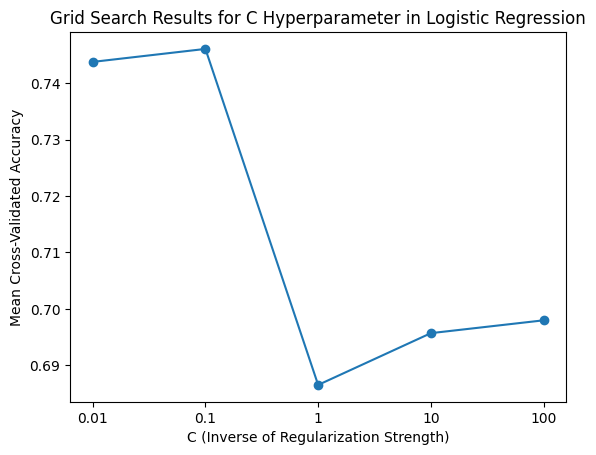

0.6545454545454545
0.7586206896551724
0.41509433962264153
0.5365853658536586


In [ ]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the range of C values to test
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression(max_iter=1000)
#predictions = clf.predict(X_test)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best C: {best_params['C']}")
print(f"Best Accuracy: {best_score}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Plotting the accuracy against different values of C
mean_test_scores = grid_search.cv_results_['mean_test_score']
params = [str(param['C']) for param in grid_search.cv_results_['params']]

plt.plot(params, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Grid Search Results for C Hyperparameter in Logistic Regression')
plt.show()


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100
print(accuracy_score(y_test, predictions))

#Precision Score
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

#Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions))

#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions))





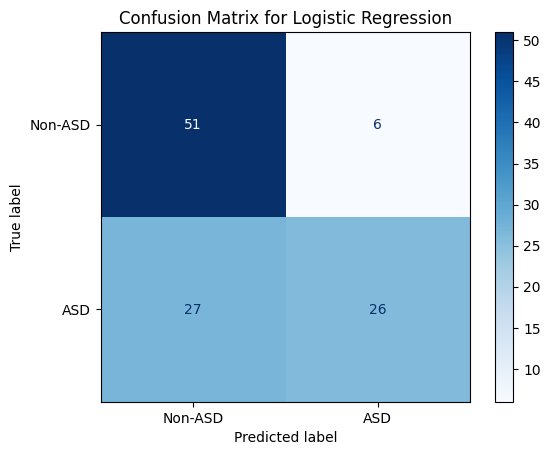

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-ASD', 'ASD'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

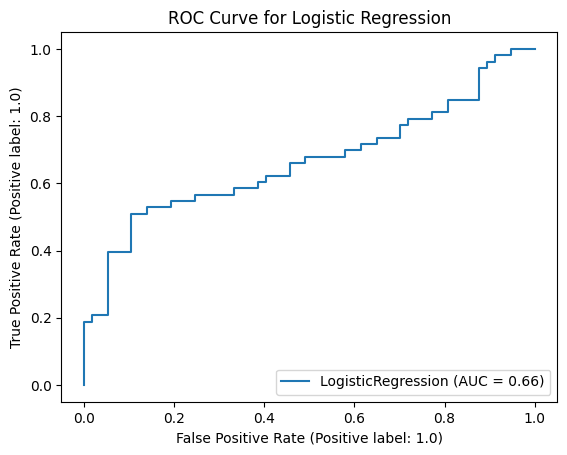

Area under the ROC Curve (AUC): 0.6646805693478981


In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

# Calculating area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Area under the ROC Curve (AUC):", auc_score)


In [ ]:
#RidgeClassifier
from sklearn.linear_model import RidgeClassifier
clf_ridge = RidgeClassifier().fit(X_train, y_train)
predictions_ridge = clf_ridge.predict(X_test)
accuracy_ridge = accuracy_score(y_test, predictions_ridge)
print(f"Ridge Classifier Accuracy: {accuracy_ridge:.4f}")

#Precision Score
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions_ridge))

#Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions_ridge))

#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions_ridge))


Ridge Classifier Accuracy: 0.6273
0.7142857142857143
0.37735849056603776
0.4938271604938272


In [ ]:
#Random Tree Classifer
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

#Precision Score
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions_rf))

#Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions_rf))

#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions_rf))

Random Forest Classifier Accuracy: 0.6545
0.7777777777777778
0.39622641509433965
0.525


In [ ]:
#Desicion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
predictions_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, predictions_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy_tree:.4f}")

#Precision Score
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions_tree))

#Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions_tree))

#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions_tree))

Decision Tree Classifier Accuracy: 0.6000
0.6097560975609756
0.4716981132075472
0.5319148936170213


In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
predictions_svc = clf_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f"Support Vector Classifier Accuracy: {accuracy_svc:.4f}")

#Precision Score
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions_svc))

#Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions_svc))

#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions_svc))

Support Vector Classifier Accuracy: 0.6545
0.7586206896551724
0.41509433962264153
0.5365853658536586
